In [ ]:
#GST Reconciliation Agent Using DONUT
!pip install transformers
!pip install torch torchvision
!pip install datasets
!pip install Pillow
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install opencv-python
!pip install reportlab
!pip install faker
!pip install timm
!pip install sentencepiece
!pip install accelerate

import torch
import torch.nn as nn
from transformers import (
    DonutProcessor,
    VisionEncoderDecoderModel,
    VisionEncoderDecoderConfig,
    AutoTokenizer,
    TrainingArguments,
    Trainer
)
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import numpy as np
import json
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cv2
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from faker import Faker
import os
from datasets import Dataset
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings('ignore')

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^

Generator


Installing reportlab...
Installing Pillow...
Installing faker...
All packages installed successfully!
🚀 Starting Invoice Generator...
Generating 1 sample invoices...
Generating invoice 1/1
✅ Saved: invoice_images/invoice_1.png and invoice_pdfs/invoice_1.pdf

🎉 All invoices generated successfully!
📁 Check 'invoice_images' folder for PNG files
📁 Check 'invoice_pdfs' folder for PDF files

📋 Generated files:
  📄 invoice_images/invoice_1.png
  📄 invoice_pdfs/invoice_1.pdf

🖼️ Displaying first generated invoice image:


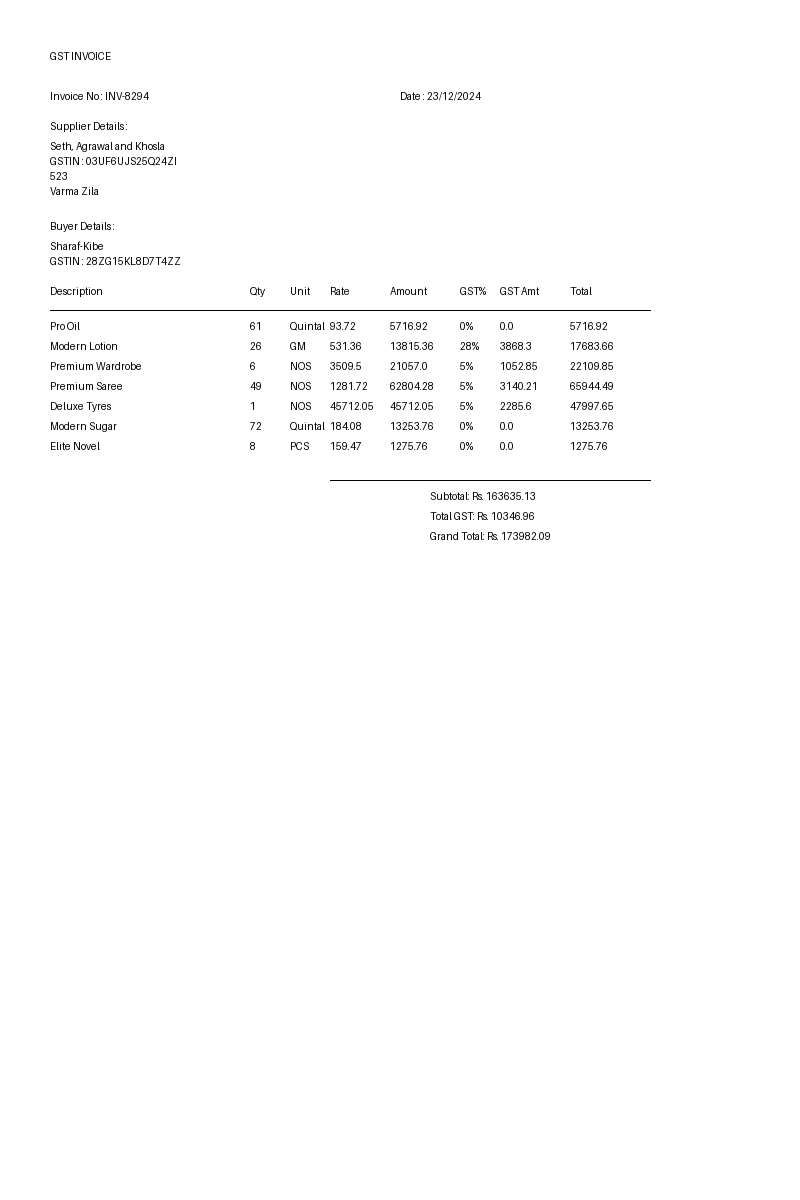


✨ Invoice generation complete! You can download the files from the file browser on the left.


In [1]:

import subprocess
import sys

def install_packages():
    packages = [
        'reportlab',
        'Pillow',
        'faker'
    ]

    for package in packages:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

    print("All packages installed successfully!")

install_packages()


import random
import os
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
from faker import Faker
from reportlab.lib.pagesizes import letter, A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib import colors

#Eyate Cheanges koribo para for generation purposes
class SyntheticInvoiceGenerator:
    def __init__(self):
        self.fake = Faker('en_IN')  # Indian locale for realistic data
        self.gst_rates = [0, 5, 12, 18, 28]  # Common GST rates in India

        # Product categories with typical descriptions
        self.product_categories = {
            'Electronics': ['Laptop', 'Mobile Phone', 'Television', 'Camera', 'Headphones', 'Tablet', 'Speaker', 'Monitor'],
            'Clothing': ['Shirt', 'Jeans', 'Dress', 'Jacket', 'T-Shirt', 'Saree', 'Kurta', 'Trousers'],
            'Food': ['Rice', 'Wheat', 'Sugar', 'Oil', 'Spices', 'Pulses', 'Tea', 'Coffee'],
            'Furniture': ['Chair', 'Table', 'Sofa', 'Bed', 'Wardrobe', 'Desk', 'Cabinet', 'Bookshelf'],
            'Cosmetics': ['Lipstick', 'Foundation', 'Shampoo', 'Cream', 'Perfume', 'Lotion', 'Soap', 'Face Wash'],
            'Automobile': ['Car', 'Bike', 'Scooter', 'Spare Parts', 'Tyres', 'Battery', 'Engine Oil', 'Accessories'],
            'Books': ['Novel', 'Textbook', 'Magazine', 'Journal', 'Dictionary', 'Comics', 'Biography', 'Manual'],
            'Sports': ['Cricket Bat', 'Football', 'Tennis Racket', 'Basketball', 'Badminton Set', 'Gym Equipment', 'Sports Shoes']
        }

    def generate_company_data(self):
        """Generate realistic company information"""
        return {
            'name': self.fake.company(),
            'address': self.fake.address(),
            'gstin': self.generate_gstin(),
            'email': self.fake.email(),
            'phone': self.fake.phone_number()
        }

    def generate_gstin(self):
        """Generate realistic GSTIN format"""
        state_code = random.randint(1, 37)
        pan = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=10))
        entity_code = random.choice(['1', '2', '4'])
        check_digit = random.choice('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
        return f"{state_code:02d}{pan}{entity_code}Z{check_digit}"

    def generate_invoice_items(self, num_items=None):
        """Generate invoice line items"""
        if num_items is None:
            num_items = random.randint(1, 8)

        items = []

        for _ in range(num_items):

            category = random.choice(list(self.product_categories.keys()))
            product = random.choice(self.product_categories[category])

            brands = ['Premium', 'Standard', 'Deluxe', 'Basic', 'Pro', 'Elite', 'Classic', 'Modern']
            description = f"{random.choice(brands)} {product}"


            gst_rate = random.choice(self.gst_rates)


            if category in ['Electronics', 'Automobile']:
                quantity = random.randint(1, 3)
                rate = round(random.uniform(5000, 50000), 2)
            elif category in ['Food']:
                quantity = random.randint(10, 100)
                rate = round(random.uniform(50, 200), 2)
            elif category in ['Clothing', 'Cosmetics']:
                quantity = random.randint(5, 50)
                rate = round(random.uniform(200, 2000), 2)
            elif category in ['Books']:
                quantity = random.randint(1, 10)
                rate = round(random.uniform(100, 800), 2)
            else:
                quantity = random.randint(1, 20)
                rate = round(random.uniform(100, 5000), 2)

            base_amount = round(quantity * rate, 2)
            gst_amount = round(base_amount * gst_rate / 100, 2)

            item = {
                'description': description,
                'category': category,
                'quantity': quantity,
                'rate': rate,
                'amount': base_amount,
                'gst_rate': gst_rate,
                'gst_amount': gst_amount,
                'total_amount': base_amount + gst_amount,
                'unit': self.get_unit_for_category(category)
            }
            items.append(item)

        return items

    def get_unit_for_category(self, category):
        """Get appropriate unit of measurement for category"""
        unit_mapping = {
            'Electronics': random.choice(['PCS', 'NOS', 'SET']),
            'Clothing': random.choice(['PCS', 'NOS']),
            'Food': random.choice(['KG', 'LTR', 'PCS', 'Quintal']),
            'Furniture': random.choice(['PCS', 'NOS', 'SET']),
            'Cosmetics': random.choice(['PCS', 'ML', 'GM']),
            'Automobile': random.choice(['NOS', 'PCS']),
            'Books': random.choice(['PCS', 'NOS']),
            'Sports': random.choice(['PCS', 'NOS', 'SET'])
        }
        return unit_mapping.get(category, 'PCS')

    def generate_invoice_data(self):
        """Generate complete invoice data"""
        supplier = self.generate_company_data()
        buyer = self.generate_company_data()
        items = self.generate_invoice_items()


        subtotal = sum(item['amount'] for item in items)
        total_gst = sum(item['gst_amount'] for item in items)
        grand_total = subtotal + total_gst

        invoice_data = {
            'invoice_number': f"INV-{random.randint(1000, 9999)}",
            'invoice_date': self.fake.date_between(start_date='-1y', end_date='today').strftime('%d/%m/%Y'),
            'supplier': supplier,
            'buyer': buyer,
            'items': items,
            'subtotal': round(subtotal, 2),
            'total_gst': round(total_gst, 2),
            'grand_total': round(grand_total, 2)
        }

        return invoice_data

class InvoiceImageGenerator:
    def __init__(self, width=800, height=1200):
        self.width = width
        self.height = height

    def create_invoice_image(self, invoice_data):
        """Create a synthetic invoice image"""

        img = Image.new('RGB', (self.width, self.height), 'white')
        draw = ImageDraw.Draw(img)


        try:
            title_font = ImageFont.load_default()
            header_font = ImageFont.load_default()
            normal_font = ImageFont.load_default()
        except:
            title_font = ImageFont.load_default()
            header_font = ImageFont.load_default()
            normal_font = ImageFont.load_default()

        y_pos = 50

        # Title
        draw.text((50, y_pos), "GST INVOICE", fill='black', font=title_font)
        y_pos += 40

        # Invoice details
        draw.text((50, y_pos), f"Invoice No : {invoice_data['invoice_number']}", fill='black', font=header_font)
        draw.text((400, y_pos), f"Date : {invoice_data['invoice_date']}", fill='black', font=header_font)
        y_pos += 30

        # Supplier info
        draw.text((50, y_pos), "Supplier Details :", fill='black', font=header_font)
        y_pos += 20
        draw.text((50, y_pos), invoice_data['supplier']['name'], fill='black', font=normal_font)
        y_pos += 15
        draw.text((50, y_pos), f"GSTIN : {invoice_data['supplier']['gstin']}", fill='black', font=normal_font)
        y_pos += 15
        # Truncate address for display
        address_lines = invoice_data['supplier']['address'].split('\n')[:2]
        for line in address_lines:
            draw.text((50, y_pos), line[:50], fill='black', font=normal_font)
            y_pos += 15

        y_pos += 20

        # Buyer info
        draw.text((50, y_pos), "Buyer Details :", fill='black', font=header_font)
        y_pos += 20
        draw.text((50, y_pos), invoice_data['buyer']['name'], fill='black', font=normal_font)
        y_pos += 15
        draw.text((50, y_pos), f"GSTIN : {invoice_data['buyer']['gstin']}", fill='black', font=normal_font)
        y_pos += 30

        # Items header
        draw.text((50, y_pos), "Description", fill='black', font=header_font)
        draw.text((250, y_pos), "Qty", fill='black', font=header_font)
        draw.text((290, y_pos), "Unit", fill='black', font=header_font)
        draw.text((330, y_pos), "Rate", fill='black', font=header_font)
        draw.text((390, y_pos), "Amount", fill='black', font=header_font)
        draw.text((460, y_pos), "GST%", fill='black', font=header_font)
        draw.text((500, y_pos), "GST Amt", fill='black', font=header_font)
        draw.text((570, y_pos), "Total", fill='black', font=header_font)
        y_pos += 25

        # Draw line
        draw.line([(50, y_pos), (650, y_pos)], fill='black', width=1)
        y_pos += 10

        # Items
        for item in invoice_data['items']:
            desc = item['description'][:25] + "..." if len(item['description']) > 25 else item['description']
            draw.text((50, y_pos), desc, fill='black', font=normal_font)
            draw.text((250, y_pos), str(item['quantity']), fill='black', font=normal_font)
            draw.text((290, y_pos), item['unit'], fill='black', font=normal_font)
            draw.text((330, y_pos), str(item['rate']), fill='black', font=normal_font)
            draw.text((390, y_pos), str(item['amount']), fill='black', font=normal_font)
            draw.text((460, y_pos), f"{item['gst_rate']}%", fill='black', font=normal_font)
            draw.text((500, y_pos), str(item['gst_amount']), fill='black', font=normal_font)
            draw.text((570, y_pos), str(item['total_amount']), fill='black', font=normal_font)
            y_pos += 20

        y_pos += 20

        # Totals
        draw.line([(330, y_pos), (650, y_pos)], fill='black', width=1)
        y_pos += 10
        draw.text((430, y_pos), f"Subtotal: Rs. {invoice_data['subtotal']}", fill='black', font=normal_font)
        y_pos += 20
        draw.text((430, y_pos), f"Total GST: Rs. {invoice_data['total_gst']}", fill='black', font=normal_font)
        y_pos += 20
        draw.text((430, y_pos), f"Grand Total: Rs. {invoice_data['grand_total']}", fill='black', font=header_font)

        return img

class InvoicePDFGenerator:
    def create_invoice_pdf(self, invoice_data, filename):
        """Create a PDF invoice"""
        doc = SimpleDocTemplate(filename, pagesize=A4)
        styles = getSampleStyleSheet()
        story = []

        # Title
        title_style = ParagraphStyle(
            'CustomTitle',
            parent=styles['Heading1'],
            fontSize=24,
            spaceAfter=30,
            alignment=1  # Center alignment
        )
        story.append(Paragraph("GST INVOICE", title_style))

        # Invoice details
        invoice_info = f"""
        <b>Invoice No :</b> {invoice_data['invoice_number']}<br/>
        <b>Date :</b> {invoice_data['invoice_date']}
        """
        story.append(Paragraph(invoice_info, styles['Normal']))
        story.append(Spacer(1, 20))

        # Company details table
        company_data = [
            ['Supplier Details', 'Buyer Details'],
            [f"{invoice_data['supplier']['name']}\nGSTIN : {invoice_data['supplier']['gstin']}",
             f"{invoice_data['buyer']['name']}\nGSTIN : {invoice_data['buyer']['gstin']}"]
        ]

        company_table = Table(company_data, colWidths=[3*inch, 3*inch])
        company_table.setStyle(TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
            ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('FONTSIZE', (0, 0), (-1, 0), 12),
            ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
            ('GRID', (0, 0), (-1, -1), 1, colors.black)
        ]))

        story.append(company_table)
        story.append(Spacer(1, 20))

        # Items table
        items_data = [['Description', 'Qty', 'Unit', 'Rate', 'Amount', 'GST%', 'GST Amt', 'Total']]

        for item in invoice_data['items']:
            items_data.append([
                item['description'],
                str(item['quantity']),
                item['unit'],
                f"₹{item['rate']}",
                f"₹{item['amount']}",
                f"{item['gst_rate']}%",
                f"₹{item['gst_amount']}",
                f"₹{item['total_amount']}"
            ])

        items_table = Table(items_data)
        items_table.setStyle(TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('FONTSIZE', (0, 0), (-1, 0), 10),
            ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
            ('GRID', (0, 0), (-1, -1), 1, colors.black)
        ]))

        story.append(items_table)
        story.append(Spacer(1, 20))

        # Totals
        totals_info = f"""
        <b>Subtotal :</b> Rs.{invoice_data['subtotal']}<br/>
        <b>Total GST :</b> Rs.{invoice_data['total_gst']}-<br/>
        <b>Grand Total :</b> Rs.{invoice_data['grand_total']}
        """
        story.append(Paragraph(totals_info, styles['Normal']))

        doc.build(story)


def generate_sample_invoices(num_invoices=5):
    """Generate sample invoices as both images and PDFs"""
    generator = SyntheticInvoiceGenerator()
    image_generator = InvoiceImageGenerator()
    pdf_generator = InvoicePDFGenerator()


    os.makedirs('invoice_images', exist_ok=True)
    os.makedirs('invoice_pdfs', exist_ok=True)

    print(f"Generating {num_invoices} sample invoices...")

    for i in range(num_invoices):
        print(f"Generating invoice {i+1}/{num_invoices}")


        invoice_data = generator.generate_invoice_data()


        image = image_generator.create_invoice_image(invoice_data)
        image_filename = f"invoice_images/invoice_{i+1}.png"
        image.save(image_filename)


        pdf_filename = f"invoice_pdfs/invoice_{i+1}.pdf"
        pdf_generator.create_invoice_pdf(invoice_data, pdf_filename)

        print(f"✅ Saved: {image_filename} and {pdf_filename}")

    print("\n🎉 All invoices generated successfully!")
    print("📁 Check 'invoice_images' folder for PNG files")
    print("📁 Check 'invoice_pdfs' folder for PDF files")


    print("\n📋 Generated files:")
    if os.path.exists('invoice_images'):
        for file in os.listdir('invoice_images'):
            print(f"  📄 invoice_images/{file}")
    if os.path.exists('invoice_pdfs'):
        for file in os.listdir('invoice_pdfs'):
            print(f"  📄 invoice_pdfs/{file}")


print("🚀 Starting Invoice Generator...")
generate_sample_invoices(1)  #Eyate number change kori tumi ji kuno amount of fakes generate koribo pariba


try:
    from IPython.display import Image as IPImage, display
    print("\n🖼️ Displaying first generated invoice image:")
    display(IPImage('invoice_images/invoice_1.png'))
except:
    print("Note: Could not display image preview, but files are generated successfully!")

print("\n✨ Invoice generation complete! You can download the files from the file browser on the left.")

In [2]:
# GST Reconciliation System - Match/Mismatch Detection

import pandas as pd
from decimal import Decimal, ROUND_HALF_UP
from datetime import datetime
import re

class GSTReconciliationEngine:
    def __init__(self, tolerance=0.01):
        """
        Initialize GST reconciliation engine
        tolerance: Acceptable difference for amount matching (default 0.01 = 1 paisa)
        """
        self.tolerance = tolerance
        self.match_results = []

    def validate_gstin(self, gstin):
        """Validate GSTIN format"""
        if not gstin or len(gstin) != 15:
            return False


        pattern = r'^[0-9]{2}[A-Z0-9]{10}[0-9][A-Z][0-9A-Z]$'
        return bool(re.match(pattern, gstin))

    def calculate_gst_amounts(self, base_amount, gst_rate):
        """Calculate GST amounts with proper rounding"""
        base_amount = Decimal(str(base_amount))
        gst_rate = Decimal(str(gst_rate))

        gst_amount = (base_amount * gst_rate / 100).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
        total_amount = base_amount + gst_amount

        return {
            'base_amount': float(base_amount),
            'gst_amount': float(gst_amount),
            'total_amount': float(total_amount)
        }

    def compare_invoices(self, invoice1_data, invoice2_data, comparison_type="buyer_seller"):
        """
        Compare two invoices for GST reconciliation
        comparison_type: "buyer_seller" (sales vs purchase) or "system_vs_ocr" (system vs extracted)
        """
        result = {
            'comparison_id': f"CMP_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
            'comparison_type': comparison_type,
            'invoice1': invoice1_data,
            'invoice2': invoice2_data,
            'matches': {},
            'mismatches': {},
            'gst_calculations': {},
            'overall_status': 'UNKNOWN',
            'confidence_score': 0.0
        }

        # Basic field comparisons
        self._compare_basic_fields(invoice1_data, invoice2_data, result)

        # GST-specific comparisons
        self._compare_gst_details(invoice1_data, invoice2_data, result)

        # Amount reconciliation
        self._reconcile_amounts(invoice1_data, invoice2_data, result)

        # Calculate overall status
        self._calculate_overall_status(result)

        return result

    def _compare_basic_fields(self, inv1, inv2, result):
        """Compare basic invoice fields"""
        basic_fields = ['invoice_number', 'invoice_date', 'supplier_gstin', 'buyer_gstin']

        for field in basic_fields:
            val1 = str(inv1.get(field, '')).strip().upper()
            val2 = str(inv2.get(field, '')).strip().upper()

            if val1 == val2:
                result['matches'][field] = {'value': val1, 'status': 'MATCH'}
            else:
                result['mismatches'][field] = {
                    'invoice1': val1,
                    'invoice2': val2,
                    'status': 'MISMATCH'
                }

    def _compare_gst_details(self, inv1, inv2, result):
        """Compare GST-specific details"""
        # GSTIN validation
        gstin_fields = ['supplier_gstin', 'buyer_gstin']
        for field in gstin_fields:
            gstin1 = inv1.get(field, '')
            gstin2 = inv2.get(field, '')

            result['gst_calculations'][f'{field}_validation'] = {
                'invoice1_valid': self.validate_gstin(gstin1),
                'invoice2_valid': self.validate_gstin(gstin2),
                'gstin1': gstin1,
                'gstin2': gstin2
            }

    def _reconcile_amounts(self, inv1, inv2, result):
        """Reconcile invoice amounts"""
        amount_fields = ['subtotal', 'total_gst', 'grand_total']

        for field in amount_fields:
            amt1 = float(inv1.get(field, 0))
            amt2 = float(inv2.get(field, 0))
            difference = abs(amt1 - amt2)

            if difference <= self.tolerance:
                result['matches'][field] = {
                    'invoice1': amt1,
                    'invoice2': amt2,
                    'difference': difference,
                    'status': 'MATCH'
                }
            else:
                result['mismatches'][field] = {
                    'invoice1': amt1,
                    'invoice2': amt2,
                    'difference': difference,
                    'percentage_diff': (difference / max(amt1, amt2)) * 100 if max(amt1, amt2) > 0 else 0,
                    'status': 'MISMATCH'
                }

        # Item-level reconciliation if items are available
        if 'items' in inv1 and 'items' in inv2:
            self._reconcile_line_items(inv1['items'], inv2['items'], result)

    def _reconcile_line_items(self, items1, items2, result):
        """Reconcile individual line items"""
        result['item_reconciliation'] = {
            'total_items_inv1': len(items1),
            'total_items_inv2': len(items2),
            'item_matches': [],
            'item_mismatches': [],
            'unmatched_items': []
        }

        # Simple matching by description (can be enhanced)
        matched_items = []

        for i, item1 in enumerate(items1):
            best_match = None
            best_score = 0

            for j, item2 in enumerate(items2):
                if j in matched_items:
                    continue

                # Simple similarity check
                desc1 = str(item1.get('description', '')).lower()
                desc2 = str(item2.get('description', '')).lower()

                if desc1 == desc2:
                    score = 1.0
                elif desc1 in desc2 or desc2 in desc1:
                    score = 0.8
                else:
                    score = 0.0

                if score > best_score:
                    best_score = score
                    best_match = (j, item2)

            if best_match and best_score >= 0.8:
                matched_items.append(best_match[0])
                item_comparison = self._compare_single_item(item1, best_match[1])
                result['item_reconciliation']['item_matches'].append({
                    'item1_index': i,
                    'item2_index': best_match[0],
                    'comparison': item_comparison
                })
            else:
                result['item_reconciliation']['unmatched_items'].append({
                    'source': 'invoice1',
                    'index': i,
                    'item': item1
                })

        # Add unmatched items from invoice2
        for j, item2 in enumerate(items2):
            if j not in matched_items:
                result['item_reconciliation']['unmatched_items'].append({
                    'source': 'invoice2',
                    'index': j,
                    'item': item2
                })

    def _compare_single_item(self, item1, item2):
        """Compare individual items"""
        comparison = {'matches': {}, 'mismatches': {}}

        fields_to_compare = ['quantity', 'rate', 'amount', 'gst_rate', 'gst_amount', 'total_amount']

        for field in fields_to_compare:
            val1 = float(item1.get(field, 0))
            val2 = float(item2.get(field, 0))
            diff = abs(val1 - val2)

            if diff <= self.tolerance:
                comparison['matches'][field] = {'value1': val1, 'value2': val2, 'difference': diff}
            else:
                comparison['mismatches'][field] = {'value1': val1, 'value2': val2, 'difference': diff}

        return comparison

    def _calculate_overall_status(self, result):
        """Calculate overall reconciliation status"""
        total_checks = len(result['matches']) + len(result['mismatches'])
        if total_checks == 0:
            result['overall_status'] = 'NO_DATA'
            result['confidence_score'] = 0.0
            return

        match_count = len(result['matches'])
        result['confidence_score'] = (match_count / total_checks) * 100

        if result['confidence_score'] >= 95:
            result['overall_status'] = 'PERFECT_MATCH'
        elif result['confidence_score'] >= 80:
            result['overall_status'] = 'GOOD_MATCH'
        elif result['confidence_score'] >= 60:
            result['overall_status'] = 'PARTIAL_MATCH'
        else:
            result['overall_status'] = 'POOR_MATCH'

    def generate_reconciliation_report(self, comparison_result):
        """Generate HTML reconciliation report"""
        # Replace the template data with actual comparison_result values
        with open("/content/gst_reconciliation_report.html", "r") as file:
            html_template = file.read()

        # Fill in dynamic data
        html_content = html_template.replace(
            "CMP_20250610_143052",
            comparison_result['comparison_id']
        ).replace(
            "83.3%",
            f"{comparison_result['confidence_score']:.1f}%"
        )
        # ... more replacements

        # Save to file
        with open(f"report_{comparison_result['comparison_id']}.html", "w") as f:
            f.write(html_content)

        return html_content

def demo_gst_reconciliation():
    """Demonstrate GST reconciliation with sample data"""
    print("🔍 GST RECONCILIATION DEMO")
    print("=" * 50)

    # Create reconciliation engine
    engine = GSTReconciliationEngine(tolerance=0.01)

    # Generate two sample invoices for comparison
    generator = SyntheticInvoiceGenerator()

    # Invoice 1 (Original)
    invoice1 = generator.generate_invoice_data()
    print("📄 Generated Invoice 1 (Seller Copy)")

    # Invoice 2 (Simulate buyer copy with some differences)
    invoice2 = invoice1.copy()
    invoice2['grand_total'] = invoice2['grand_total'] + 0.50  # Small difference
    invoice2['buyer_gstin'] = '29DIFFERENT123K2Y6'  # Different GSTIN

    print("📄 Generated Invoice 2 (Buyer Copy with differences)")

    # Perform reconciliation
    print("\n🔄 Performing GST Reconciliation...")
    comparison_result = engine.compare_invoices(invoice1, invoice2, "buyer_seller")

    # Generate and display report
    report = engine.generate_reconciliation_report(comparison_result)
    print(report)

    return comparison_result

def batch_reconciliation(invoice_list1, invoice_list2):
    """Perform batch reconciliation of multiple invoices"""
    engine = GSTReconciliationEngine()
    results = []

    print(f"🔄 Processing {len(invoice_list1)} vs {len(invoice_list2)} invoices...")

    for i, inv1 in enumerate(invoice_list1):
        best_match = None
        best_score = 0

        for j, inv2 in enumerate(invoice_list2):
            # Quick matching by invoice number
            if inv1.get('invoice_number') == inv2.get('invoice_number'):
                comparison = engine.compare_invoices(inv1, inv2)
                results.append(comparison)
                print(f"✅ Matched: {inv1['invoice_number']} - {comparison['overall_status']}")
                break

    # Summary
    perfect_matches = len([r for r in results if r['overall_status'] == 'PERFECT_MATCH'])
    good_matches = len([r for r in results if r['overall_status'] == 'GOOD_MATCH'])
    partial_matches = len([r for r in results if r['overall_status'] == 'PARTIAL_MATCH'])
    poor_matches = len([r for r in results if r['overall_status'] == 'POOR_MATCH'])

    print(f"\n📊 BATCH RECONCILIATION SUMMARY:")
    print(f"   Perfect Matches: {perfect_matches}")
    print(f"   Good Matches: {good_matches}")
    print(f"   Partial Matches: {partial_matches}")
    print(f"   Poor Matches: {poor_matches}")

    return results

# Integration with OCR system
def ocr_vs_system_reconciliation(image_path, system_invoice_data, model_path="./invoice_ocr_model"):
    """Compare OCR extracted data with system data"""
    print("🔍 OCR vs System Data Reconciliation")
    print("=" * 40)

    # Extract data using trained OCR model
    trainer = InvoiceOCRTrainer()
    try:
        ocr_data = trainer.inference(image_path, model_path)
        print("✅ OCR extraction completed")
    except Exception as e:
        print(f"❌ OCR extraction failed: {e}")
        return None

    # Perform reconciliation
    engine = GSTReconciliationEngine()
    comparison = engine.compare_invoices(system_invoice_data, ocr_data, "system_vs_ocr")

    # Generate report
    report = engine.generate_reconciliation_report(comparison)
    print(report)

    return comparison

# Execute demo
if __name__ == "__main__":
    print("🚀 Starting GST Reconciliation System...")

    # Run demo
    try:
        demo_result = demo_gst_reconciliation()
        print("\n" + "="*60)
        print("✅ GST Reconciliation Demo completed successfully!")
        print("You can now use the system for:")
        print("   • Invoice vs Invoice comparison")
        print("   • OCR vs System data reconciliation")
        print("   • Batch processing of multiple invoices")
        print("   • GSTIN validation")
        print("   • Amount reconciliation with tolerance")
    except NameError:
        print("❌ Please run the invoice generator code first!")

🚀 Starting GST Reconciliation System...
🔍 GST RECONCILIATION DEMO
📄 Generated Invoice 1 (Seller Copy)
📄 Generated Invoice 2 (Buyer Copy with differences)

🔄 Performing GST Reconciliation...
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>GST Reconciliation Report</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }
        
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            padding: 20px;
        }
        
        .report-container {
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            border-radius: 20px;
            box-shadow: 0 20px 40px rgba(0,0,0,0.1);
            overflow: hidden;
        }
        
   